### Background

Ozone concentrations in the atmosphere are often measured using ozonesondes.  In this task ozonesonde measurements from the Oberpreissenberg observatory in Southern Germany are worked on.  The data are available from the World Ozone and Ultraviolet Radiation Data Centre.

#### Dependencies

In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob

In [714]:
listpath='../../data/pdap/exam1/2018*.csv'

### Task 1.1

In [721]:
def readfnc(filename):
    return pd.read_csv(filename,index_col=[], skiprows=34, usecols=[0,1,2], comment='#', delimiter=',')

In [722]:
readfnc('../../data/pdap/exam1/20180202.brewer-mast.na.na.dwd-mohp.csv').head()

,Pressure,O3PartialPressure,Temperature
0,893.56,1.68,-2.7
1,886.61,1.77,-3.3
2,879.40,1.81,-3.5
3,873.47,1.91,-4.0
4,868.42,2.02,-4.1


### Task 1.2

In [650]:
def ozonemixing(filename):
    n = readfnc(filename)
    n['OzoneMixingRatio'] = n['O3PartialPressure']/n['Pressure']
    n[{'OzoneMixingRatio'}]
    return n

In [651]:
ozonemixing('../../data/pdap/exam1/20180202.brewer-mast.na.na.dwd-mohp.csv').head()

,Pressure,O3PartialPressure,Temperature,OzoneMixingRatio
0,893.56,1.68,-2.7,0.001880
1,886.61,1.77,-3.3,0.001996
2,879.40,1.81,-3.5,0.002058
3,873.47,1.91,-4.0,0.002187
4,868.42,2.02,-4.1,0.002326


### Task 1.3

In [652]:
def ptplotfnc(filename):
    m = readfnc(filename)
    ax = plt.axes()
    ax.plot(m['Pressure'], m['Temperature'])
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Pressure')
    return ax

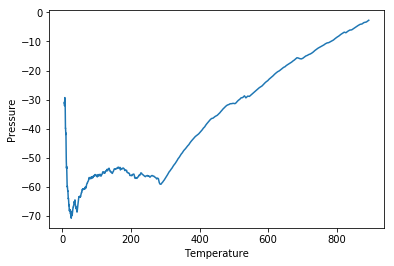

In [653]:
ptplotfnc('../../data/pdap/exam1/20180202.brewer-mast.na.na.dwd-mohp.csv')

for files in glob.glob("../../data/pdap/exam1/2018*.csv"):
    ptplotfnc(files)

### Task 1.4

In [654]:
def calc_o3_statistics(filename):
    return_val = []
    h = ozonemixing(filename)
    maxi = h['OzoneMixingRatio'].max()
    mini = h['OzoneMixingRatio'].min()
    avgr = h['OzoneMixingRatio'].mean()
    max_p = (h['OzoneMixingRatio'].max()==h['OzoneMixingRatio'])
    maxp = h[max_p]['Pressure'].values[0]
    return_val = [maxi,mini,avgr,maxp]
    return return_val

In [655]:
calc_o3_statistics('../../data/pdap/exam1/20180202.brewer-mast.na.na.dwd-mohp.csv')

[0.7526555386949925, 0.0018801199695599625, 0.23083198920033543, 6.59]

### Task 1.5

In [656]:
def filesozmax(filepath):
    array=[]
    for files in sorted(glob.glob(filepath)):
        a = calc_o3_statistics(files)
        array.append(a[0])
    return array

In [715]:
filesozmax(listpath)

[0.7526555386949925,
 0.7011406844106464,
 0.6197740112994351,
 0.9473684210526315,
 0.6646928201332347,
 0.5621219171707772,
 0.6741682974559686,
 0.8289322617680825,
 0.6523400191021967,
 0.7347130761994355,
 0.6648480124707715,
 0.5722423614707406]

In [657]:
def filesprmax(filepath):
    array=[]
    for files in sorted(glob.glob(filepath)):
        a = calc_o3_statistics(files)
        array.append(a[3])
    return array

In [716]:
filesprmax(listpath)

[6.59,
 13.15,
 17.7,
 12.16,
 13.51,
 21.49,
 10.22,
 8.71,
 10.47,
 10.63,
 12.83,
 19.31]

### Task 1.6

In [658]:
def filelist(filepath):
    array=[]
    for files in sorted(glob.glob(filepath)):
        name = datetime.datetime.strptime(files[24:30],"%y%m%d").strftime('%b %d')
        array.append(name)
    return array

In [717]:
b = filelist(listpath)
c = filesozmax(listpath)
d = filesprmax(listpath)

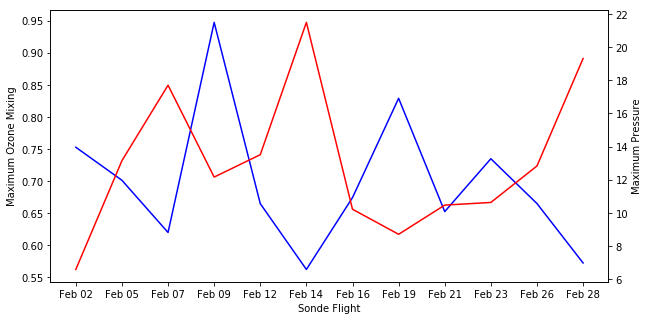

In [718]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(b,c, 'b-')
ax1.set_xlabel('Sonde Flight')
ax1.set_ylabel('Maximum Ozone Mixing')
ax2 = ax1.twinx()
ax2.plot(b,d, 'r-')
ax2.set_ylabel('Maximum Pressure')
plt.show()

### Task 1.7

In [712]:
def allplot_p_vs_o(filepath):
    for files in sorted(glob.glob(filepath)):
        m = ozonemixing(files)
        plt.figure()
        ax = plt.axes()
        ax.plot(m['Pressure'], m['OzoneMixingRatio'])
        ax.set_xlabel('OzoneMixingRatio')
        ax.set_ylabel('Pressure')
        name = datetime.datetime.strptime(files[24:30],"%y%m%d").strftime('%b %d')
        ax.legend([name],loc=1, bbox_to_anchor=(0.5,0.,0.5,0.5))

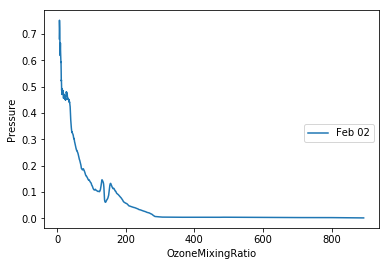

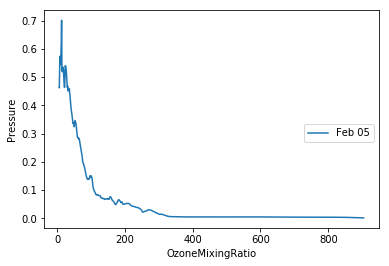

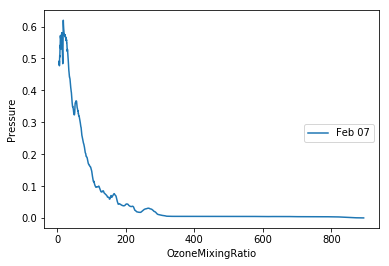

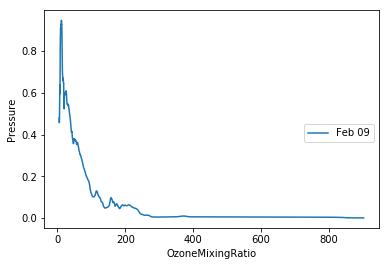

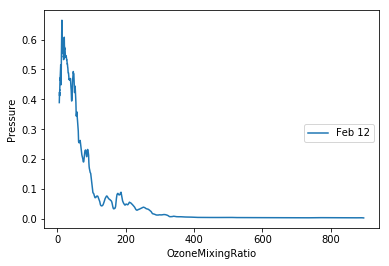

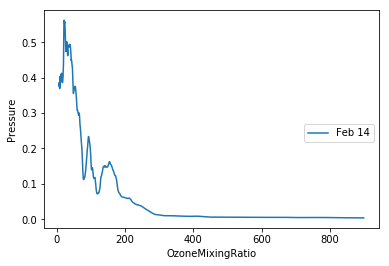

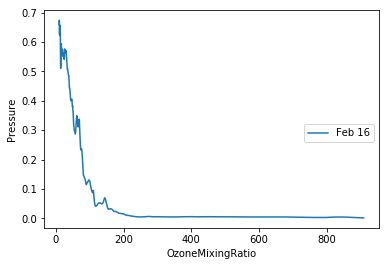

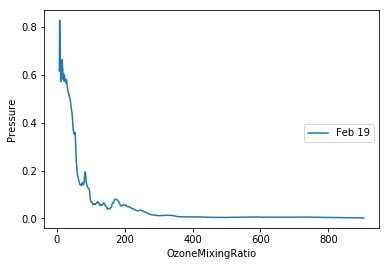

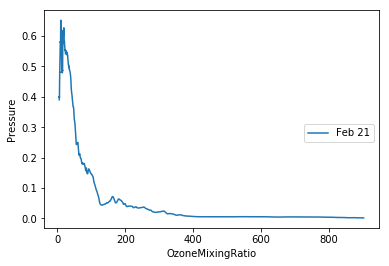

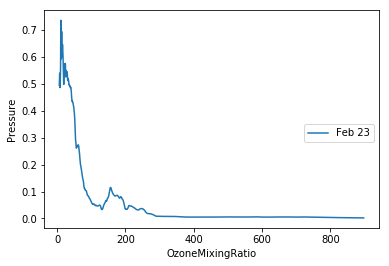

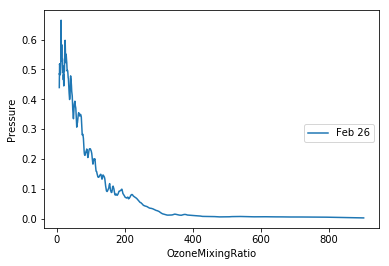

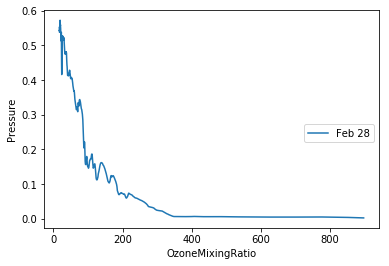

In [719]:
allplot_p_vs_o(listpath)

### Task 2.1

In [669]:
def dateparse(year,month):
    mydatetime = year + " " + month
    return pd.datetime.strptime(mydatetime, '%Y %m')

In [723]:
data = pd.read_csv('../../data/pdap/exam1/exam1_co2-data.txt', comment='#', delim_whitespace=True,
                   parse_dates= {'datetime': ['year', 'date']}, 
                   date_parser = dateparse, index_col= 'datetime',
            names=['year', 'date', 'decimaldate', 'average', 'interpolated', 'trend', 'days'])

In [709]:
data.head()

,decimaldate,average,interpolated,trend,days
datetime,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


### Task 2.2

In [671]:
def CO_Minplt():
    ax = plt.axes()
    ax.set_xlabel('Minimum')
    ax.set_ylabel('Year')
    return ax.plot(data.resample('Y')['average'].min())

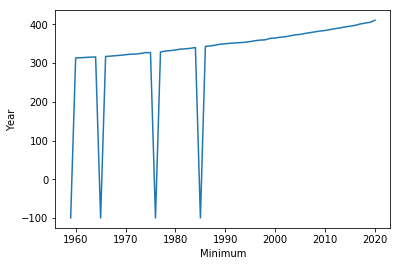

In [706]:
CO_Minplt()

In [672]:
def CO_Maxplt():
    ax = plt.axes()
    ax.set_xlabel('Maximum')
    ax.set_ylabel('Year')
    return ax.plot(data.resample('Y')['average'].max())

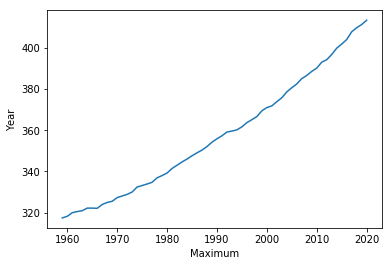

In [707]:
CO_Maxplt()

In [673]:
def CO_Avrplt():
    ax = plt.axes()
    ax.set_xlabel('Average')
    ax.set_ylabel('Year')
    return ax.plot(data.resample('Y')['average'].mean())

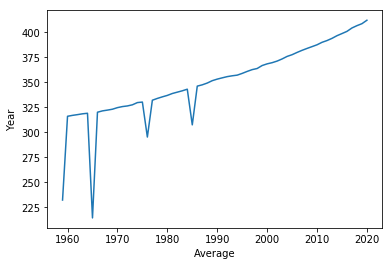

In [708]:
CO_Avrplt()

### Task 2.2

In [674]:
def CO_Monthplt():
    ax = plt.axes()
    ax.set_xlabel('Monthly')
    ax.set_ylabel('Year')
    g = data.groupby(data.index.month)
    monthly_averages = g.aggregate({"average":np.mean})
    return ax.plot(monthly_averages)

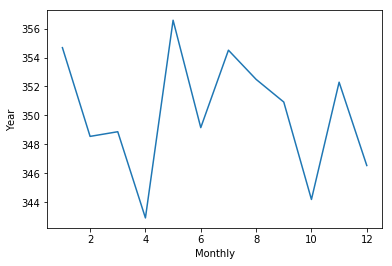

In [675]:
CO_Monthplt()

#### References
https://stackoverflow.com/